# Grey radiation

This notebook describes the [grey radiation model](https://github.com/jduffield65/ClimateModel/blob/93531b01aa740f3dede0b2944db8710c083c3a91/Model/radiation/grey.py) and goes through some examples of things that can be done with it.

The basis of this model is to produce the vertically one dimensional structure of the atmosphere given a concentration distribution of greenhouse gases. 

I used chapters 10 and 14 of [Atmospheric Circulation Dynamics and General Circulation Models](https://www.springer.com/gp/book/9783642135736) and chapter 4 of [Principles of Planetary Climate](https://www.cambridge.org/gb/academic/subjects/earth-and-environmental-science/climatology-and-climate-change/principles-planetary-climate?format=HB&isbn=9780521865562) to help produce the model.

## Model description
### Conservation of energy
The total energy of the atmosphere is given by:
\begin{equation}
\rho e^{tot} = \frac{1}{2}\rho \pmb{v}^2 + \rho \Phi + \rho u
\label{eq: 1}\tag{1}
\end{equation}
This is the sum of kinetic energy, gravitational potential energy ($\Phi = gz$) and internal energy. There is no source of total energy, meaning it is conserved:
\begin{equation}
\frac{\partial}{\partial t}(\rho e^{etot}) + \nabla \cdot \pmb{F}^{etot} = 0
\label{eq: 2}\tag{2}
\end{equation}
Where $\textbf{F}^{etot}$ is the flux density vector of total energy determined by the the balance equations for each component of $e^{tot}$.

\begin{equation}
\frac{\partial \rho}{\partial t} + \nabla \cdot (\rho \pmb{v}) = 0
\label{eq: 3}\tag{3}
\end{equation}

\begin{equation}
\frac{d\pmb{v}}{dt} + 2\pmb{\Omega} \times \pmb{v} =  -\frac{1}{\rho}\nabla p - \nabla \Phi
\label{eq: 4}\tag{4}
\end{equation}

Using $(2)$ along with conservation of mass $(3)$ and conservation of momentum $(4)$ as well as the fact $\frac{\partial \Phi}{\partial t}=0$, we can obtain an equation for the evolution of kinetic and potential energy in flux form (note that $\frac{d}{dt} = \frac{\partial}{\partial t} + \pmb{v} \cdot \nabla$):

\begin{equation}
\frac{\partial}{\partial t}(\frac{1}{2}\rho \pmb{v}^2) + \nabla \cdot \left[ \left(\frac{1}{2}\rho \pmb{v}^2 + p\right)\pmb{v} \right] = p \nabla \cdot \pmb{v} - \rho \cdot \nabla \Phi
\label{eq: 5}\tag{5}
\end{equation}

\begin{equation}
\frac{\partial}{\partial t}(\rho \Phi) + \nabla \cdot \left(\rho \Phi \pmb{v}\right) = \rho \pmb{v}\cdot \nabla \Phi
\label{eq: 6}\tag{6}
\end{equation}

We can determine the internal energy equation by noting that the right hand sides (RHS) of $(5)$ and $(6)$ are source terms of energy so the source term for the internal energy equation must be $-p \nabla \cdot \pmb{v}$ so the source term of total energy (sum of RHS of $(5)$, $(6)$ and $(7)$) equals $0$ as to satisfy equation $(2)$. Thus the internal energy equation is:

\begin{equation}
\frac{\partial}{\partial t}(\rho u) + \nabla \cdot \left(\rho u \pmb{v} + \pmb{F}\right) = -p \nabla \cdot \pmb{v}
\label{eq: 7}\tag{7}
\end{equation}


$\pmb{F}$ is the flux density of internal energy other than the advection term i.e. it is the heat flux. In the grey radiation model, we assume the only contribution is from radiation (as opposed to sensible heat - molecular thermal diffusion). 

We want to use all these equations to get an expression for how temperature, $T$, responds to changes in $\pmb{F}$. We can combine $(7)$ and $(3)$ to give:

\begin{equation}
\rho \left(\frac{du}{dt} + p\frac{dv_s}{dt}\right) = -\nabla \cdot \pmb{F}
\label{eq: 8}\tag{8}
\end{equation}

Where $v_s = 1/ \rho$ is specific volume. If we then use the definition of enthalpy, $dh = du + d(pv_s)$, we get an expression for the evolution of enthalpy:

\begin{equation}
\rho \frac{dh}{dt} = \frac{dp}{dt} - \nabla \cdot \pmb{F}
\label{eq: 9}\tag{9}
\end{equation}

We can then use $h = c_pT$ where $c_p$ is the heat capacity of air at constant pressure per unit mass (units are J/K/kg). We are also only interested in a 1D vertical ($\nabla \rightarrow \frac{\partial}{\partial z}$), static ($\pmb{v} \rightarrow 0$) atmosphere in this section. Under these conditions, $\frac{d}{dt} \rightarrow \frac{\partial}{\partial t}$, $(3)$ gives $\rho = constant$, $(4)$ gives $\frac{\partial p}{\partial t} = 0$ and $\frac{\partial}{\partial z} = -g\rho \frac{\partial}{\partial p}$. This gives our final temperature equation:

\begin{equation}
\frac{\partial T}{\partial t} = \frac{g}{c_p}\frac{\partial F}{\partial t}
\label{eq: 10}\tag{10}
\end{equation}

[In the model](https://github.com/jduffield65/ClimateModel/blob/93531b01aa740f3dede0b2944db8710c083c3a91/Model/radiation/grey.py#L283-L285), we discretize this using a finite volume method (pressure and flux are at the boundaries of a cell whereas temperature is at the cell centre):

\begin{equation}
\frac{T^{n+1}_{i+1/2} - T^{n}_{i+1/2}}{\Delta t} = \frac{g}{c_p}\frac{F^{n}_{i+1} - F^{n}_i}{p_{i+1} - p_i}
\label{eq: 11}\tag{11}
\end{equation}

Where $i$ indicates grid position and $n$ indicates time.

### Flux equation
Now to complete the equation, we want to find an expression for $F$ as a function of $T$ and $p$.

Lets consider a slab of atmosphere of thickness $\Delta z$ containing a gas with mass density $q(z)$ and absorption coefficient $k_{\nu}(z)$ at frequency ${\nu}$. Let there be an upwelling flux, $F^{\uparrow}_{\nu}(z)$ at the bottom of the slab and an upwelling flux $F^{\uparrow}_{\nu}(z+\Delta z)$ at the top. There is a change in flux because the layer of atmosphere absorbs and emits radiation. According to Kirchoff's law, emissivity = absorptivity = $e_{\nu}$ and we have:

\begin{equation}
F^{\uparrow}_{\nu}(z+\Delta z) = (1-e_{\nu})F^{\uparrow}_{\nu}(z) + e_{\nu}B(\nu, T)
\label{eq: 12}\tag{12}
\end{equation}

This means that the radiation flux that reaches the top of this slab of atmosphere is equal to the amount that was incident upon the bottom of the slab minus the amount absorbed by the slab plus the amount emitted by the slab. We assume local thermodynamic equilibrium so the emitted radiation follows the blackbody distribution, $B(\nu, T)$. The emissivity is given by $e_{\nu} = q(z)k_{\nu}(z)\Delta z$ and if we sub this into $(12)$, and take the limit $\Delta z \rightarrow 0$:

\begin{equation}
\frac{dF^{\uparrow}_{\nu}}{dz} = -qk_{\nu}F^{\uparrow}_{\nu} + qk_{\nu}B(\nu, T)
\label{eq: 13}\tag{13}
\end{equation}

If we now define optical depth, $\tau_{\nu}$ such that $d\tau_{\nu} = qkdz$, we get:

\begin{equation}
\frac{dF^{\uparrow}_{\nu}}{d\tau_{\nu}} = -F^{\uparrow}_{\nu} + B(\nu, T)
\label{eq: 14}\tag{14}
\end{equation}

Optical depth increases as you move down through the atmosphere, coming from space ($\tau_{\nu} = 0$ at the top of the atmosphere), and can be though of as the effective distance travelled by light at a particular frequency give the interaction with the gas. The more the gas interacts with the light, the greater the optical depth. Going through the same analysis but considering the downwelling radiation incident upon the top of the slab, we get:

\begin{equation}
F^{\downarrow}_{\nu}(z-\Delta z) = (1-e_{\nu})F^{\downarrow}_{\nu}(z) + e_{\nu}B(\nu, T)
\label{eq: 15}\tag{15}
\end{equation}

which becomes:

\begin{equation}
\frac{dF^{\downarrow}_{\nu}}{d\tau_{\nu}} = F^{\downarrow}_{\nu} - B(\nu, T)
\label{eq: 16}\tag{16}
\end{equation}


### Grey gas approximation
The flux we need to sub into $(11)$ is $F = \int F^{\uparrow}_{\nu} d\nu - \int F^{\downarrow}_{\nu} d\nu$. So we need to know the frequency dependence of $\tau_{\nu}$. In the grey gas approximation, we assume that $k_{\nu}$ and thus $\tau_{\nu}$ doesn't depend on frequency. Integrating $(14)$ and $(16)$ over all frequencies then gives:

\begin{equation}
\frac{dF^{\uparrow}}{d\tau} = -F^{\uparrow} + \sigma_B T^4
\label{eq: 17}\tag{17}
\end{equation}

\begin{equation}
\frac{dF^{\downarrow}}{d\tau} = F^{\downarrow} - \sigma_B T^4
\label{eq: 18}\tag{18}
\end{equation}

where $\sigma_B$ is the Boltzmann constant. The solution to $(17)$ is given by:

\begin{equation}
F^{\uparrow}(\tau) = F^{\uparrow}(\tau = 0)e^{-\tau} + \int_0^{\tau} \sigma_B T(\tau')^4e^{\tau' - \tau} d\tau'
\label{eq: 19}\tag{19}
\end{equation}

In the model, we find the flux at pressure level $i-1$, corresponding to $\tau -\Delta \tau$ from the flux at pressure level $i$, corresponding to $\tau$. The equation for this is given by:

\begin{equation}
F^{\uparrow}_{i} = F^{\uparrow}_{i-1}e^{-\Delta \tau} + \int_{\tau - \Delta \tau}^{\tau} \sigma_B T(\tau')^4e^{\tau' - \tau} d\tau'
\label{eq: 20}\tag{20}
\end{equation}

We simplify this, by assuming that $T$ is constant between $\tau -\Delta \tau$ and $\tau$, so we take it out the integral and give it the value at $i-\frac{1}{2}$. [So we finally get](https://github.com/jduffield65/ClimateModel/blob/93531b01aa740f3dede0b2944db8710c083c3a91/Model/radiation/grey.py#L220-L222):

\begin{equation}
F^{\uparrow}_{i-1} = F^{\uparrow}_{i}e^{\Delta \tau} + \sigma_B T_{i-1/2}^4(1 - e^{\Delta \tau})
\label{eq: 21}\tag{21}
\end{equation}

And similarly, [for downwelling](https://github.com/jduffield65/ClimateModel/blob/93531b01aa740f3dede0b2944db8710c083c3a91/Model/radiation/grey.py#L223-L225):

\begin{equation}
F^{\downarrow}_{i-1} = F^{\downarrow}_{i}e^{-\Delta \tau} + \sigma_B T_{i-1/2}^4(1 - e^{-\Delta \tau})
\label{eq: 22}\tag{22}
\end{equation}

We can then compute $F_i = F^{\uparrow}_{i} - F^{\downarrow}_{i}$ and sub into $(11)$.

The boundary conditions are $F^{\uparrow}(\tau = 0) = (1-A)F^{\odot}/4$ and $F^{\downarrow}(\tau = 0) = 0$. $F^{\odot} = 1367 Wm^{-2}$ is the solar constant and $A$ is the albedo, indicating how much of the solar radiation is reflected, a typical value is 0.3. The first boundary conditions basically states that the radiation emitted by the planet into space must balance the radiation incoming into the planet from the star. The second boundary condition states that the star does not provide any radiation in the frequency range emitted by the planet (planet is cooler than star so frequency spectrum is at much lower frequency). The fact that both boundary conditions are at the top of the atmosphere is the reason why equations $(21)$ and $(22)$ are written such that the flux at level i-1 is calculated from the flux at level i (not sure this makes physical sense for the upward flux though!!). 

## Short wavelength interacting atmosphere
Equations $(17)$ to $(22)$ are derived assuming the atmosphere only interacts with the long wavelength radiation emitted by the planet and by the atmosphere itself and not with the short wave radiation coming from the star. 

To a first approximation, we can include the interaction with short wave radiation by instead of integrating $(13)$ and $(14)$ over all frequencies, but over two separate frequency regimes.

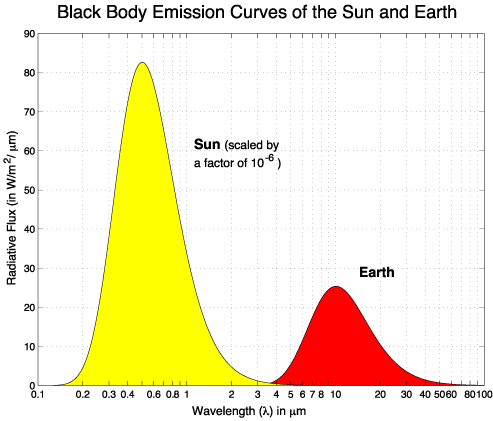

We get the short wave ($sw$) fluxes by integrating over the solar spectrum, so from about $\nu(\lambda = 0.1 \mu m)$ to $\nu(\lambda = 3 \mu m)$ as indicated above. We get the long wave ($lw$) fluxes by integrating over the eart spectrum, so from about $\nu(\lambda = 3 \mu m)$ to $\nu(\lambda = 100 \mu m)$. To do this we have to integrate over $B(\nu, T)$ in the two regimes. But the temperature in $B(\nu, T)$ is the temperature of a thin layer of the atmosphere and we expect this to be approximately the surface temperature of the planet and much smaller than the temperature of the star. Hence we can say:

\begin{equation}
\int_{\nu(\lambda = 3 \mu m)}^{\infty} B(\nu, T) d\nu \approx 0
\label{eq: 23}\tag{23}
\end{equation}

\begin{equation}
\int_{0}^{\nu(\lambda = 3 \mu m)} B(\nu, T) d\nu \approx \int_{0}^{\infty} B(\nu, T) d\nu = \sigma_B T^4
\label{eq: 24}\tag{24}
\end{equation}

And our four equations are:

\begin{equation}
\frac{dF^{\uparrow}_{lw}}{d\tau_{lw}} = -F^{\uparrow}_{lw} + \sigma_B T^4
\label{eq: 25}\tag{25}
\end{equation}

\begin{equation}
\frac{dF^{\downarrow}_{lw}}{d\tau_{lw}} = F^{\downarrow}_{lw} - \sigma_B T^4
\label{eq: 26}\tag{26}
\end{equation}

\begin{equation}
\frac{dF^{\uparrow}_{sw}}{d\tau_{sw}} = -F^{\uparrow}_{sw}
\label{eq: 27}\tag{27}
\end{equation}

\begin{equation}
\frac{dF^{\downarrow}_{sw}}{d\tau_{sw}} = F^{\downarrow}_{sw}
\label{eq: 28}\tag{28}
\end{equation}

The boundary conditions for the short wave equations are $F^{\uparrow}_{sw}(\tau = 0) = AF^{\odot}/4$ and $F^{\downarrow}_{sw}(\tau = 0) = F^{\odot}/4$. This is to satisfy the amount of solar light reflected by the planet and the flux of stellar light that reaches the planet respectively. Using these, [we get](https://github.com/jduffield65/ClimateModel/blob/93531b01aa740f3dede0b2944db8710c083c3a91/Model/radiation/grey.py#L241-L243):

\begin{equation}
F^{\uparrow}_{sw} = \frac{1}{4}AF^{\odot}e^{\tau_{sw}}
\label{eq: 29}\tag{29}
\end{equation}

\begin{equation}
F^{\downarrow}_{sw} = \frac{1}{4}F^{\odot}e^{-\tau_{sw}}
\label{eq: 30}\tag{30}
\end{equation}

The $F$ value to sub into $(11)$ in this case is $F = F^{\uparrow}_{lw} + F^{\uparrow}_{sw} - F^{\downarrow}_{lw} - F^{\downarrow}_{sw}$.

The key here is that $(24)-(25)$ and $(29)-(30)$ depend on different optical depths. So if an atmosphere had no gas that interacted with stellar light, $\tau_{sw}$ would be zero everywhere and $F_{sw}$ would be constant everywhere and just provide a boundary condition for $F_{lw}$ as in equations $(17)-(22)$. But if an atmosphere did have a gas that interacted with stellar light, $\tau_{sw}$ would be positive at the surface and thus from $(30)$, it is clear that less radiation will reach the surface causing a cooling effect there.

